In [364]:
class mlp:
  def __init__(self):
    self.o5 = 0
    self.o6 = 0
    self.o7 = 0

    # Hidden Layer
    self.w_to_5 = [.3, -.2, .2, .1]
    self.w_to_6 = [.1, .4, -.3, .4]
    # Output Layer
    self.w_to_7 = [-.3, .2]

    self.Theta_5, self.Theta_6, self.Theta_7 = .2, .1, -.3

    self.o_k = 0
    self.e7, self.e6, self.e5 = 0,0,0

mlp_o = mlp()

Truth table Input and Output (x1 is 1st col and x2 is 2nd col)

In [365]:
x1 = [0,0,1,1]
x2 = [0,1,0,1]
y  = [0,1,1,0]

Input and bias

In [366]:
x = [1,1,0,1]
x_0 = 1

Weights

In [367]:
# # Hidden Layer
# w_to_5 = [.3, -.2, .2, .1]
# w_to_6 = [.1, .4, -.3, .4]
# # Output Layer
# w_to_7 = [-.3, .2]

Bias Weight

In [368]:
# Theta_5, Theta_6, Theta_7 = .2, .1, -.3
# Thetas = [Theta_5, Theta_6, Theta_7]

Hyperparameters

In [369]:
leaning_rate = .8
error = []

In [370]:
delta_error = lambda learning_rate, error: learning_rate*error

In [371]:
# def weighted_sum_integers(weights, integers):
#     return sum(w * x for w, x in zip(weights, integers))

# def weighted_sum_list(weights, integer_lists):
#     return [sum(w * x for w, x in zip(weights, sublist)) for sublist in integer_lists]
def weighted_sum(weights, data):
    if isinstance(data, int) or isinstance(data, float):
        return weights * data
    elif isinstance(data[0], list):
        return [sum(w * x for w, x in zip(weights, sublist)) for sublist in data]
    else:
        if len(weights) != len(data):
            raise ValueError("Length of weights and data must be the same for a list of integers")
        return sum(w * x for w, x in zip(weights, data))


In [372]:
# def w_mul(input,w):
#   sum = 0
#   if isinstance(data, int) or isinstance(data, float):
#     sum+= input*w
#   elif len(input)>1:
#     for i, e in enumerate(input):
#       sum+= e*w[i]
#   else:
#     print("No input provided")
#   return sum
#     # print("sum+ ",e," * ",w[i],"=",sum)

In [373]:
def calc_I(input, w, b_w, b_b):
  # print(input, w, b_w, b_b)
  sum = weighted_sum(input,w)
  sum+=  weighted_sum(b_w,b_b)
  # print("Bias:\n","sum+ ", b_w," * ",b_b,"=",sum)

  # print("I ",sum)
  return sum

In [374]:
import numpy as np

def out():
  i5 = calc_I(x, mlp_o.w_to_5, x_0, mlp_o.Theta_5)
  i6 = calc_I(x, mlp_o.w_to_6, x_0, mlp_o.Theta_6)
  mlp_o.o5 = np.linalg.inv(1+ np.exp([[-i5]])).flatten()[0]
  mlp_o.o6 = np.linalg.inv(1+ np.exp([[-i6]])).flatten()[0]
  # next layer
  nxt_x = [mlp_o.o5,mlp_o.o6]
  # print("Next layer Inputs: ",nxt_x)
  i7 = calc_I(nxt_x, mlp_o.w_to_7, x_0, mlp_o.Theta_7)
  mlp_o.o7 = np.linalg.inv(1+ np.exp([[-i7]])).flatten()[0]
  return mlp_o.o7

In [375]:
error_iter = lambda e: 1-e

In [393]:
# o_k = out()[0][0][0][0]
# error.append(error_iter(out()).flatten()[0])
# print(o_k)
def run():
  mlp_o.o_k = out()
  error.append(error_iter(out()))
  print("Error: ",error[-1])
  print("Output:",mlp_o.o_k)

In [377]:
def check(n_layers, bias):
  n_b = len(bias)
  if n_layers != n_b:
    print("Number of Bias less than number of layers") if n_b > n_layers else print("Number of Bias more than number of layers")
    return False
  return True

# Backpropogation

In [378]:
e_k = lambda o_k,o_a: o_k*(1-o_k)*(o_a-o_k)

Output Layer

In [379]:
# # error.append(e_k(o_k,1))
# e7 = e_k(o_k,1)
# print("e7:",e7)

Hidden Layer

In [380]:
# e_h_k = lambda o_k,o_a: o_k*(1-o_k)*(e*for e in error)

In [381]:
# # e_h_k(o6,1)
# e6 = mlp_o.o6*(1-mlp_o.o6)*(e7*mlp_o.w_to_7[1])
# print("e6:",e6)

In [382]:
# e5 = mlp_o.o5*(1-mlp_o.o5)*(e7*mlp_o.w_to_7[0])
# print("e5:",e5)

In [383]:
def update_errors():
  mlp_o.e7 = e_k(mlp_o.o_k,1)
  print("e7:",mlp_o.e7)
  mlp_o.e6 = mlp_o.o6*(1-mlp_o.o6)*(mlp_o.e7*mlp_o.w_to_7[1])
  print("e6:",mlp_o.e6)
  mlp_o.e5 = mlp_o.o5*(1-mlp_o.o5)*(mlp_o.e7*mlp_o.w_to_7[0])
  print("e5:",mlp_o.e5)

Update weights

In [384]:
def update_weights_based_on_error():
  for i,ele in enumerate(x):
    mlp_o.w_to_5[i] = mlp_o.w_to_5[i] + leaning_rate*mlp_o.e5*ele
    mlp_o.w_to_6[i] = mlp_o.w_to_6[i] + leaning_rate*mlp_o.e6*ele
  print("Weight to 5",mlp_o.w_to_5)
  print("Weight to 6",mlp_o.w_to_6)
  mlp_o.w_to_7[0] = mlp_o.w_to_7[0]  + leaning_rate*mlp_o.e7*mlp_o.o5
  mlp_o.w_to_7[1] = mlp_o.w_to_7[1] + leaning_rate*mlp_o.e7*mlp_o.o6
  print("Weight to 7",mlp_o.w_to_7 )

  mlp_o.Theta_7 = mlp_o.Theta_7 + leaning_rate*mlp_o.e7
  mlp_o.Theta_6 = mlp_o.Theta_6 + leaning_rate*mlp_o.e6
  mlp_o.Theta_5 = mlp_o.Theta_5 + leaning_rate*mlp_o.e5

In [385]:
error = []

In [394]:
iter = 0
print("Iter:",iter)
run()
update_errors()
update_weights_based_on_error()
iter+=1
print("Iter:",iter)
run()
update_errors()
update_weights_based_on_error()
iter+=1
while iter >1 and iter <10000:
  print("Iter:",iter)
  run()
  if  error[-1] > error[-2] or error[-1]==0:
    print("Converge: \nCurr error:{} \nPrev error:{}".format(error[-1], error[-2]))
    break
  update_errors()
  update_weights_based_on_error()
  iter+=1

Streaming output truncated to the last 5000 lines.
e6: 2.884284312583475e-06
e5: 3.7781823840584297e-06
Weight to 5 [0.5437510785069047, 0.0437510785069034, 0.2, 0.3437510785069027]
Weight to 6 [0.46730234109209984, 0.7673023410921044, -0.3, 0.7673023410921044]
Weight to 7 [1.3538899741487869, 2.3138478686685806]
Iter: 9445
Error:  0.004170751853725285
Output: 0.9958292481462747
e7: 1.7322620083553045e-05
e6: 2.8840562658499164e-06
e5: 3.7778958532923597e-06
Weight to 5 [0.5437541008235873, 0.04375410082358604, 0.2, 0.3437541008235853]
Weight to 6 [0.4673046483371125, 0.7673046483371171, -0.3, 0.7673046483371171]
Weight to 7 [1.3539010355074623, 2.3138606452080763]
Iter: 9446
Error:  0.0041705913726189925
Output: 0.995829408627381
e7: 1.7321289830030746e-05
e6: 2.883828254210895e-06
e5: 3.7776093653714447e-06
Weight to 5 [0.5437571229110796, 0.04375712291107833, 0.2, 0.34375712291107763]
Weight to 6 [0.46730695539971584, 0.7673069553997205, -0.3, 0.7673069553997205]
Weight to 7 [1.3539

In [396]:
print("{} Initial Error \n{} Last Error".format(error[1],error[-1]))

0.5289784623791298 Initial Error 
0.004084544513685118 Last Error


# Single layer perceptron

In [301]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

In [302]:
import numpy as np
# from sklearn import datasets

# # load iris dataset
# iris = datasets.load_iris()
# X = iris["data"][:, (2, 3)]  # petal length, petal width
# y = (iris["target"] == 2).astype(int)  # 1 if Iris-Virginica, else 0
# y = y.reshape([150,1])

In [303]:
import numpy as np


def unit_step_func(x):
    return np.where(x > 0 , 1, 0)

class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y > 0 , 1, 0)

        # learn weights
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # print(idx,"x_i",x_i )
                linear_output = np.dot(x_i, self.weights) + self.bias
                # print("linear_output",linear_output)
                y_predicted = self.activation_func(linear_output)
                # print("y_predicted",y_predicted)


                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

In [304]:
# x1 = [0,0,1,1]
# x2 = [0,1,0,1]
# X=x1+x2
# y  = [0,1,1,0]
# X = np.array([[0,0,1,1],[0,1,0,1]])
X = np.array([[0,0],[0,1],[1,0],[1,1]])
# y = np.array( [0,1,1,0])
y = np.array( [0,1,1,1])

In [305]:
X.shape

(4, 2)

In [306]:
    p = Perceptron(learning_rate=0.1, n_iters=1000)
    p.fit(X, y)

In [307]:
p.weights

array([0.1, 0.1])

In [308]:
# predictions = p.predict([0,1,0,0])

In [309]:
# p.predict([[0,0,1,1],[0,1,0,1],[1,1,1,1],[0,0,0,1],[1,0,1,0],[1,1,0,1]])
p.predict([[0,0],[0,1],[1,0],[1,1]])

array([0, 1, 1, 1])

Perceptron classification accuracy 1.0


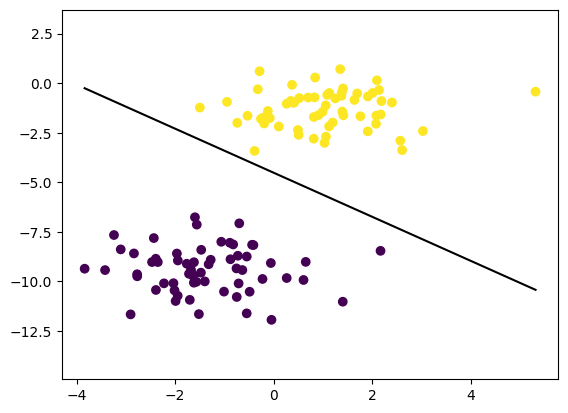

In [310]:

# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_blobs(
        n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)

    print("Perceptron classification accuracy", accuracy(y_test, predictions))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()

# Reference

In [311]:
import numpy as np

class MLP(object):
    def __init__(self, num_inputs=3, hidden_layers=[3, 3], num_outputs=2):
        self.num_inputs = num_inputs
        self.hidden_layers = hidden_layers
        self.num_outputs = num_outputs

        # create a generic representation of the layers
        layers = [num_inputs] + hidden_layers + [num_outputs]

        # create random connection weights for the layers
        weights = []
        for i in range(len(layers)-1):
            w = np.random.rand(layers[i], layers[i+1])
            weights.append(w)
        self.weights = weights

    def forward_propagate(self, inputs):
        # the input layer activation is just the input itself
        activations = inputs

        # iterate through the network layers
        for w in self.weights:
            # calculate matrix multiplication between previous activation and weight matrix
            net_inputs = np.dot(activations, w)
            activations = self._sigmoid(net_inputs)
        return activations

    def _sigmoid(self, x):
        y = 1.0 / (1 + np.exp(-x))
        return y

if __name__ == "__main__":
    mlp = MLP()
    inputs = np.random.rand(mlp.num_inputs)
    output = mlp.forward_propagate(inputs)
    print("Network activation: {}".format(output))

Network activation: [0.81666234 0.76343362]


In [312]:
X = x1+x2

In [313]:
X = np.array(X)
y = np.array(y)


In [397]:
# # create an instance of the MLP class
# mlp = MLP(input_size=4, hidden_size=2, output_size=1)

# # train the MLP on the training data
# mlp.fit(X, y)

# # make predictions on the test data
# y_pred = mlp.predict(X)

# # evaluate the accuracy of the MLP
# accuracy = np.mean(y_pred == y)
# print(f"Accuracy: {accuracy:.2f}")

# Params

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(2, kernel_size=(2, 2), padding='same', activation='relu', input_shape=(4, 4,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(3, kernel_size=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(15, activation='relu'))
model.add(Dense(9, activation='softmax'))

model.summary()

In [ ]:
# prompt: create a sequential model

model = Sequential()
model.add(Conv2D(50, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(50, (3, 3), strides=(2, 2), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

